# Intermediate Data Cleaning

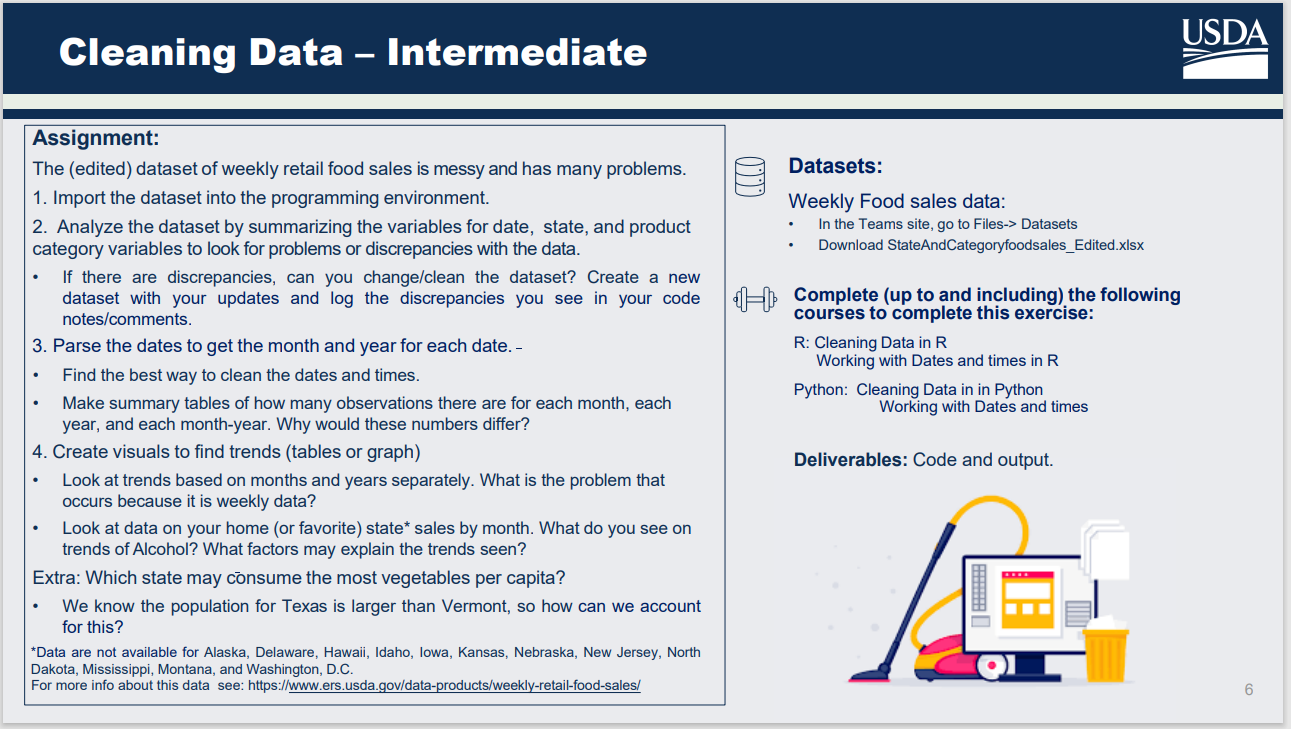

Keyboard Shortcuts

    a - new cell above
    b - new cell below
    m - make cell markdown
    d,d - delete cell
    Escape - exit cell
    Enter - enter cell

Resources: 

    https://pandas.pydata.org/docs/
    Geeks for Geeks
    Stack Overflow
    Statology
    SaturnCloud

### Import Libraries

I usually like to have a single code cell where I keep all my libraries for a notebook

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests

## 1) Import the data

In [2]:
# If you have errors using pd.read_excel try running the following line of code:
#!pip install xlrd 

The StateAndCategoryfoodsales_Edited excel file is relatively small and stored locally. 

Because we can open the file, we can see that there are two sheets names Variables and "By State and Product Category." 

Make sure the file is closed when you try to read it into your notebook

In [3]:
# not including sheet_name will pull the first sheet by default
df_var = pd.read_excel('StateAndCategoryfoodsales_Edited.xlsx', sheet_name="Variables") # This file came from the Teams site
df_var

,Variable name,Definition
0,,
1,Date,Week ending
2,State,State
3,Category,Food category
4,Dollars,Total value of sales
5,Dollars last year,Total value of sales same week last year
6,Dollars 2 years ago,"Total value of sales, same week 2 years ago (a..."
7,Unit sales,"Total units sold, any size"
8,Unit sales last year,"Total units sold, any size, same week last year"
9,Unit sales 2 years ago,"Total units sold, any size, same week 2 years ..."


In [4]:
# Remove the empty row
# df.drop([0, 1]) https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html
# We could also re-index the dataframe

df_var.drop([0]),inplace=True)

In [5]:
df_var.head()

,Variable name,Definition
1,Date,Week ending
2,State,State
3,Category,Food category
4,Dollars,Total value of sales
5,Dollars last year,Total value of sales same week last year


In [6]:
# you can also read the second sheet using the sheet index "sheet_name=1"
# This file came from the Teams site
df_SP = pd.read_excel('StateAndCategoryfoodsales_Edited.xlsx', header=1, sheet_name="By State and Product Category") 


In [7]:
df_SP

,Date,State,Category,Dollars,Unit sales,Volume sales,Dollars last year,Unit sales last year,Volume sales last year,Dollars 2 years ago,Volume sales 2 years ago,Unit sales 2 years ago,Percent change dollars 1 year,Percent change units 1 year,Percent change volume 1 year,Percent change dollars 2 years,Percent change units 2 years,Percent change volume 2 years
0,2019-10-06,Alabama,Alcohol,23580628.0,2969760.0,836512.0,22435659.0,2.976745e+06,8.147946e+05,NaN,NaN,NaN,5.1,-0.2,2.7,NaN,NaN,NaN
1,2019-10-13,Alabama,Alchohol,23191408.0,2891303.0,828622.0,23309843.0,2.977404e+06,8.549987e+05,NaN,NaN,NaN,-0.5,-2.9,-3.1,NaN,NaN,NaN
2,2019-10-20,AL,Alcohol,21743590.0,2727065.0,761632.0,21063269.0,2.744731e+06,7.658904e+05,NaN,NaN,NaN,3.2,-0.6,-0.6,NaN,NaN,NaN
3,2019-10-27,Alabama,Alcohol,21929512.0,2761075.0,767176.0,20183470.0,2.650938e+06,7.135053e+05,NaN,NaN,NaN,8.7,4.2,7.5,NaN,NaN,NaN
4,2019-11-03,Alabama,Alcohol,23150890.0,2868207.0,813904.0,22560881.0,2.883969e+06,8.014359e+05,NaN,NaN,NaN,2.6,-0.5,1.6,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60543,2022-03-13,Wyoming,Vegetables,2209523.0,1051342.0,1679977.0,2338312.0,1.204262e+06,1.947183e+06,3223424.0,1744538.0,2879219.0,-5.5,-12.7,-13.7,-31.5,-39.7,-41.7
60544,NA = data not available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60545,Note: The series is subject to revision based ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60546,Source: USDA Economic Research Service calcula...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


If we needed, we could set the row that the header should be read from 

    df = pd.read_excel('StateAndCategoryfoodsales_Edited.xlsx', sheet_name=1, header=1)

or we could skip the 1st row by setting the skiprows argument

    df = pd.read_excel('StateAndCategoryfoodsales_Edited.xlsx', sheet_name=1, skiprows=1)

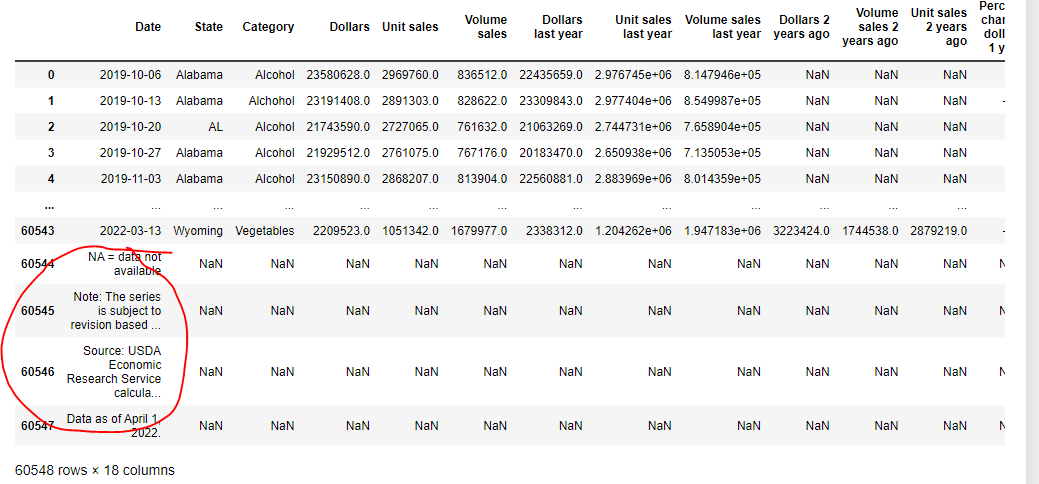

There is a footer at the bottom of this table. Let's drop the last 4 rows

In [8]:
df_SP = df_SP[:-4]
df_SP

,Date,State,Category,Dollars,Unit sales,Volume sales,Dollars last year,Unit sales last year,Volume sales last year,Dollars 2 years ago,Volume sales 2 years ago,Unit sales 2 years ago,Percent change dollars 1 year,Percent change units 1 year,Percent change volume 1 year,Percent change dollars 2 years,Percent change units 2 years,Percent change volume 2 years
0,2019-10-06,Alabama,Alcohol,23580628.0,2969760.0,836512.0,22435659.0,2.976745e+06,8.147946e+05,NaN,NaN,NaN,5.1,-0.2,2.7,NaN,NaN,NaN
1,2019-10-13,Alabama,Alchohol,23191408.0,2891303.0,828622.0,23309843.0,2.977404e+06,8.549987e+05,NaN,NaN,NaN,-0.5,-2.9,-3.1,NaN,NaN,NaN
2,2019-10-20,AL,Alcohol,21743590.0,2727065.0,761632.0,21063269.0,2.744731e+06,7.658904e+05,NaN,NaN,NaN,3.2,-0.6,-0.6,NaN,NaN,NaN
3,2019-10-27,Alabama,Alcohol,21929512.0,2761075.0,767176.0,20183470.0,2.650938e+06,7.135053e+05,NaN,NaN,NaN,8.7,4.2,7.5,NaN,NaN,NaN
4,2019-11-03,Alabama,Alcohol,23150890.0,2868207.0,813904.0,22560881.0,2.883969e+06,8.014359e+05,NaN,NaN,NaN,2.6,-0.5,1.6,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60539,2022-02-13,Wyoming,Vegetables,2258597.0,1081699.0,1643260.0,2116725.0,1.073103e+06,1.700914e+06,2065888.0,1049232.0,1736579.0,6.7,0.8,-3.4,9.3,3.1,-5.4
60540,2022-02-20,Wyoming,Vegetables,2188311.0,1064096.0,1633907.0,2118201.0,1.073690e+06,1.709884e+06,2053057.0,1051155.0,1754092.0,3.3,-0.9,-4.4,6.6,1.2,-6.9
60541,2022-02-27,Wyoming,Vegetables,2168305.0,1053851.0,1623450.0,2131421.0,1.086845e+06,1.691471e+06,2177937.0,1124819.0,1916169.0,1.7,-3.0,-4.0,-0.4,-6.3,-15.3
60542,2022-03-06,Wyoming,Vegetables,2349916.0,1125181.0,1780928.0,2217235.0,1.128977e+06,1.815873e+06,2252017.0,1160336.0,1937490.0,6.0,-0.3,-1.9,4.3,-3.0,-8.1


This could also be done in the data pull

    df = pd.read_excel('StateAndCategoryfoodsales_Edited.xlsx', sheet_name=1, skiprows=1, skipfooter=4) #Removing the last 4 rows


## 2) Explore the data

Analyze the dataset by summarizing the variables for date, state, and product category variables to look for problems or discrepancies in the data. If there are discrepancies, can we change/clean them?

First, let's make a copy of our data frame for making changes and preserve our original data frame

In [9]:
#df = df.copy() # then do the steps this avoids setting with copy warning
# df_fixed = df_SP # potentially problematic
df_fixed = df_SP.copy()

### Dates

So let's see what kind of values we have in the Date column

In [10]:
# List unique values in the date column
print(df_fixed['Date'].unique())
print('Number Unique:', df_fixed['Date'].nunique())

['2019-10-06' '2019-10-13' '2019-10-20' '2019-10-27' '2019-11-03'
 '2019-11-10' '2019-11-17' '2019-11-24' '2019-12-01' '2019-12-08'
 '2019-12-15' '2019-12-22' '2019-12-29' '2020-01-05' '2020-01-12'
 '2020-01-19' '2020-01-26' '2020-02-02' '2020-02-09' '2020-02-16'
 '2020-02-23' '2020-03-01' '2020-03-08' '2020-03-15' '2020-03-22'
 '2020-03-29' '2020-04-05' '2020-04-12' '2020-04-19' '2020-04-26'
 '2020-05-03' '2020-05-10' '2020-05-17' '2020-05-24' '2020-05-31'
 '2020-06-07' '2020-06-14' '2020-06-21' '2020-06-28' '2020-07-05'
 '2020-07-12' '2020-07-19' '2020-07-26' '2020-08-02' '2020-08-09'
 '2020-08-16' '2020-08-23' '2020-08-30' '2020-09-06' '2020-09-13'
 '2020-09-20' '2020-09-27' '2020-10-04' '2020-10-11' '2020-10-18'
 '2020-10-25' '2020-11-01' '2020-11-08' '2020-11-15' '2020-11-22'
 '2020-11-29' '2020-12-06' '2020-12-13' '2020-12-20' '2020-12-27'
 '2021-01-03' '2021-01-10' '2021-01-17' '2021-01-24' '2021-01-31'
 '2021-02-07' '2021-02-14' '2021-02-21' '2021-02-28' '2021-03-07'
 '2021-03-

Issues:
* Mixed types (strings and datetime)
* A date of 1/16/2042 (can't be correct since this data are not projections)?

First, let's convert the date type to datetime64 to make all types consistent

In [11]:
#Using the `to_datetime` method to convert the string and datetime objects to datetime64 objects

df_fixed['Date'] = pd.to_datetime(df_fixed['Date'])
df_fixed['Date'].unique()

array(['2019-10-06T00:00:00.000000000', '2019-10-13T00:00:00.000000000',
       '2019-10-20T00:00:00.000000000', '2019-10-27T00:00:00.000000000',
       '2019-11-03T00:00:00.000000000', '2019-11-10T00:00:00.000000000',
       '2019-11-17T00:00:00.000000000', '2019-11-24T00:00:00.000000000',
       '2019-12-01T00:00:00.000000000', '2019-12-08T00:00:00.000000000',
       '2019-12-15T00:00:00.000000000', '2019-12-22T00:00:00.000000000',
       '2019-12-29T00:00:00.000000000', '2020-01-05T00:00:00.000000000',
       '2020-01-12T00:00:00.000000000', '2020-01-19T00:00:00.000000000',
       '2020-01-26T00:00:00.000000000', '2020-02-02T00:00:00.000000000',
       '2020-02-09T00:00:00.000000000', '2020-02-16T00:00:00.000000000',
       '2020-02-23T00:00:00.000000000', '2020-03-01T00:00:00.000000000',
       '2020-03-08T00:00:00.000000000', '2020-03-15T00:00:00.000000000',
       '2020-03-22T00:00:00.000000000', '2020-03-29T00:00:00.000000000',
       '2020-04-05T00:00:00.000000000', '2020-04-12

Now let's remove the 2042 date but keeping all the data before 4/1/2022

In [12]:
df_fixed = df_fixed[df_fixed['Date']<'4/1/2022']
df_fixed['Date'].unique()

array(['2019-10-06T00:00:00.000000000', '2019-10-13T00:00:00.000000000',
       '2019-10-20T00:00:00.000000000', '2019-10-27T00:00:00.000000000',
       '2019-11-03T00:00:00.000000000', '2019-11-10T00:00:00.000000000',
       '2019-11-17T00:00:00.000000000', '2019-11-24T00:00:00.000000000',
       '2019-12-01T00:00:00.000000000', '2019-12-08T00:00:00.000000000',
       '2019-12-15T00:00:00.000000000', '2019-12-22T00:00:00.000000000',
       '2019-12-29T00:00:00.000000000', '2020-01-05T00:00:00.000000000',
       '2020-01-12T00:00:00.000000000', '2020-01-19T00:00:00.000000000',
       '2020-01-26T00:00:00.000000000', '2020-02-02T00:00:00.000000000',
       '2020-02-09T00:00:00.000000000', '2020-02-16T00:00:00.000000000',
       '2020-02-23T00:00:00.000000000', '2020-03-01T00:00:00.000000000',
       '2020-03-08T00:00:00.000000000', '2020-03-15T00:00:00.000000000',
       '2020-03-22T00:00:00.000000000', '2020-03-29T00:00:00.000000000',
       '2020-04-05T00:00:00.000000000', '2020-04-12

In [13]:
print(df_fixed.groupby(['Date'])['Date'].count())

Date
2019-10-06    473
2019-10-13    473
2019-10-20    473
2019-10-27    473
2019-11-03    473
             ... 
2022-02-20    473
2022-02-27    473
2022-03-06    473
2022-03-08      1
2022-03-13    472
Name: Date, Length: 129, dtype: int64


In [14]:
mask = df_fixed['Date'] == '2022-03-08'
print(mask.sum())

1


In [15]:
df_fixed.loc[mask,:]

,Date,State,Category,Dollars,Unit sales,Volume sales,Dollars last year,Unit sales last year,Volume sales last year,Dollars 2 years ago,Volume sales 2 years ago,Unit sales 2 years ago,Percent change dollars 1 year,Percent change units 1 year,Percent change volume 1 year,Percent change dollars 2 years,Percent change units 2 years,Percent change volume 2 years
55551,2022-03-08,California,Vegetables,107280998.0,50953271.0,68185214.0,107963734.0,54468923.0,73135825.0,181027447.0,93035977.0,130986146.0,-0.6,-6.5,-6.8,-40.7,-45.2,-47.9


### State

Let's look at any discrepancies in the State column

In [16]:
df_fixed['State'].unique()

array(['Alabama', 'AL ', 'AL', 'Bama', 'Arizona', 'Arizonia', 'AZ',
       'Arkansas', 'Arkanss', 'California', 'CALifornia', 'Colorado',
       'Colrado', 'Connecticut', 'Florida', 'Floride', 'Georgia',
       'Illinois', 'Illlnois', 'Indiana', 'Iowa', 'IOWA', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Nebraska',
       'Nevada', 'New Hampshire', 'New Mexico', 'New York',
       'North Carolina', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'TX', 'Tex'], dtype=object)

There are multiple cases of the same state being listed different ways. Unless we make these consistent, they will be interepeted by our program as different states.

A dictionary mapping the old versions to your changes can help you keep track of your edits

In [17]:
state_fix_dict = {
    'AL ':'Alabama', # So all 'AL's will be changed to 'Alabama's
    'AL':'Alabama',
    'Bama':'Alabama',
    'Arizonia':'Arizona',
    'AZ':'Arizona',
    'Arkanss':'Arkansas',
    'CALifornia':'California',
    'Colrado':'Colorado',
    'Floride':'Florida',
    'Illlnois':'Illinois',
    'IOWA':'Iowa',
    'TX':'Texas',
    'Tex':'Texas'
}

In [18]:
# Example
state_fix_dict['AL ']

'Alabama'

Use the 'replace()' method with your dictionary to change all instances at once

In [19]:
df_fixed['State'].replace(state_fix_dict).unique()

array(['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Florida', 'Georgia', 'Illinois', 'Indiana', 'Iowa',
       'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Nebraska', 'Nevada', 'New Hampshire', 'New Mexico',
       'New York', 'North Carolina', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

Looks like each state in listed only once. Now we need to replace the State column with our cleaned State column 

In [20]:
df_fixed['State'] = df_fixed['State'].replace(state_fix_dict)

### Product Category

In [21]:
df_fixed['Category'].unique()

array(['Alcohol', 'Alchohol', 'Booze', 'Moonshine', 'alchohol',
       'Alcohols', 'Beverages', 'Commercially prepared items', 'Dairy',
       'Milk', 'milk', 'dairy', 'lactose', 'Fats and oils', 'Fruits',
       'Froots', 'Grains', 'Meats, eggs, and nuts', 'Other',
       'Sugar and sweeteners', 'Vegetables', 'Vargetable', 'Vegetanles',
       'Vegies'], dtype=object)

We will repeat the process we did for cleaning the State column

In [22]:
category_fix_dict = {
    'Alchohol':'Alcohol',
    'alchohol':'Alcohol',
    'Booze':'Alcohol',
    'Moonshine':'Alcohol',
    'Alcohols':'Alcohol',
    'Milk':'Dairy',
    'milk':'Dairy',
    'dairy':'Dairy',
    'lactose':'Dairy',
    'Froots':'Fruits',
    'Vargetable':'Vegetables',
    'Vegetanles':'Vegetables',
    'Vegies':'Vegetables',
}

Replacing the values with the `category_fix_dict` dictionary and checking that everything is fixed

In [23]:
df_fixed['Category'] = df_fixed['Category'].replace(category_fix_dict)
df_fixed['Category'].unique()

array(['Alcohol', 'Beverages', 'Commercially prepared items', 'Dairy',
       'Fats and oils', 'Fruits', 'Grains', 'Meats, eggs, and nuts',
       'Other', 'Sugar and sweeteners', 'Vegetables'], dtype=object)

### Check for Nan

In [24]:
# Check for NaN values
# How many values are missing?
print(df_fixed.isna().sum())

Date                                  0
State                                 0
Category                              0
Dollars                               0
Unit sales                            2
Volume sales                       5504
Dollars last year                   271
Unit sales last year                281
Volume sales last year             5753
Dollars 2 years ago               24866
Volume sales 2 years ago          24873
Unit sales 2 years ago            28112
Percent change dollars 1 year       271
Percent change units 1 year         281
Percent change volume 1 year       5753
Percent change dollars 2 years    24866
Percent change units 2 years      24875
Percent change volume 2 years     28112
dtype: int64


In [25]:
df_fixed.shape

(60543, 18)

In [26]:
# What percent of the data does that represent?
print(df_fixed.isna().sum()/df_fixed.shape[0])

Date                              0.000000
State                             0.000000
Category                          0.000000
Dollars                           0.000000
Unit sales                        0.000033
Volume sales                      0.090911
Dollars last year                 0.004476
Unit sales last year              0.004641
Volume sales last year            0.095023
Dollars 2 years ago               0.410716
Volume sales 2 years ago          0.410832
Unit sales 2 years ago            0.464331
Percent change dollars 1 year     0.004476
Percent change units 1 year       0.004641
Percent change volume 1 year      0.095023
Percent change dollars 2 years    0.410716
Percent change units 2 years      0.410865
Percent change volume 2 years     0.464331
dtype: float64


The columns:
* Dollars 2 years ago              
* Volume sales 2 years ago         
* Unit sales 2 years ago 
* Percent change dollars 2 years   
* Percent change units 2 years     
* Percent change volume 2 years

Are all missing over 40% of the data. It would be best to avoid using these columns. If we need to use them, we would need to have a strong understanding of how the data is missing and make that known to anyone who receives our analysis.

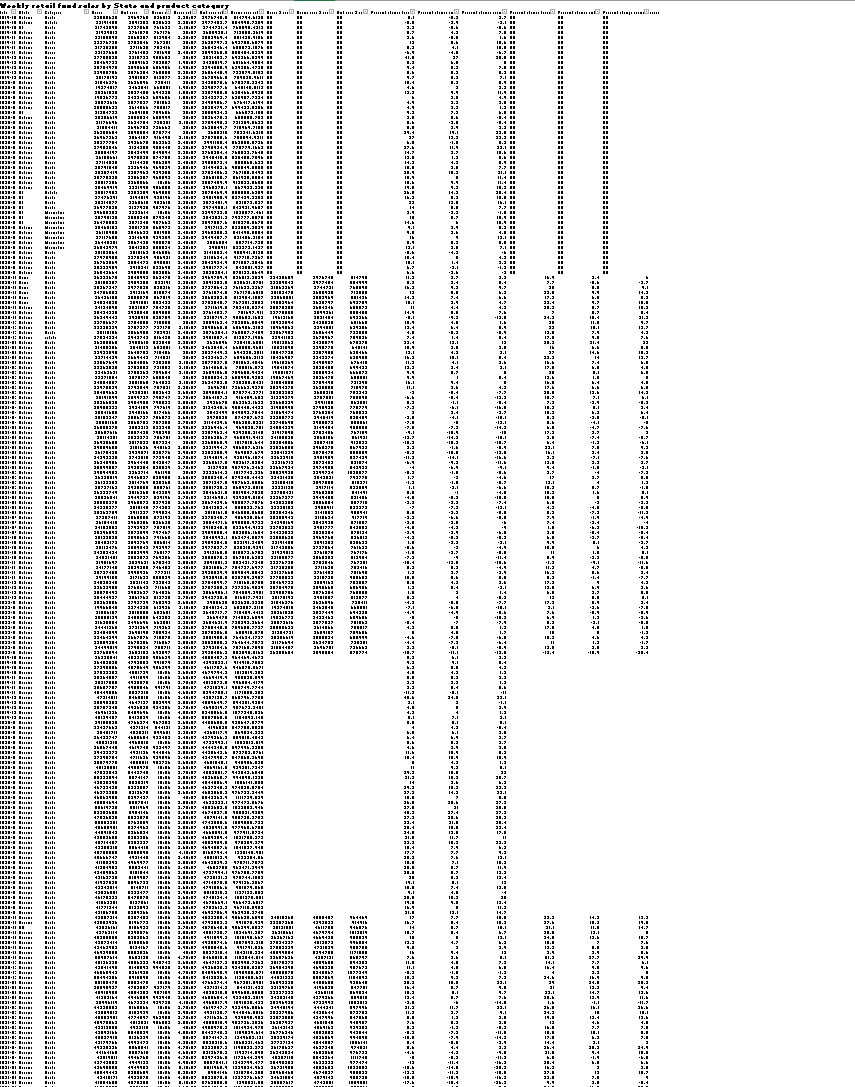

The data is not missing at random. We could explore missing data by time, by state, or by product

In [27]:
missing_test = df_fixed[["Date",'State','Category','Percent change volume 2 years']].copy()

In [28]:
missing_test['PC_Miss'] = missing_test['Percent change volume 2 years'].isna()
missing_test['PC_Miss'].head(100)

0      True
1      True
2      True
3      True
4      True
      ...  
95    False
96    False
97    False
98    False
99    False
Name: PC_Miss, Length: 100, dtype: bool

In [29]:
missing_by_date = missing_test.groupby(['Date'])['PC_Miss'].sum()
print(missing_by_date)

Date
2019-10-06    473
2019-10-13    473
2019-10-20    473
2019-10-27    473
2019-11-03    473
             ... 
2022-02-20     43
2022-02-27     43
2022-03-06     43
2022-03-08      0
2022-03-13     43
Name: PC_Miss, Length: 129, dtype: int64


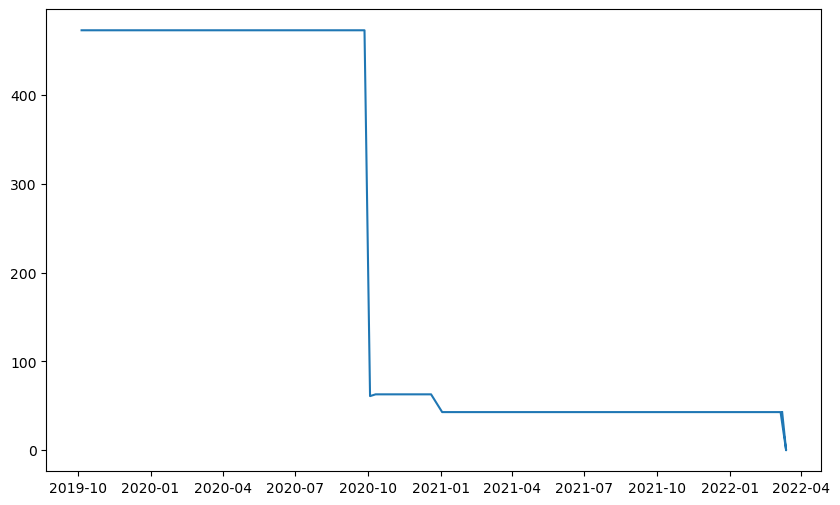

In [30]:
plt.figure(figsize=(10,6))

plt.plot(missing_test['Date'].unique(), missing_by_date)        # plot x and y using default line style and color 

Most missingness seems to come from the years 2019 and 2020 not having "2 years ago" data, but there are other sources of missingness 

What we do about these NaN values depends on how we want to use the data. We could drop them, or replace them (impute them) using a variety of methods

The data is entered by time, so using `filna()` with the `ffill` (propagate last valid observation forward to next valid) method would be appropriate. But, we have many different States and Categories, so it would be best to perform that separately for each state and category

Did anyone else find any discrepancies? Does anyone have alternate solutions?

## 3) Parse the dates

Since the `Date` column is of the datetime64 type, we can access some attributes, such as `month` and `year` in the `dt` attribute.

In [31]:
df_fixed['Date'].dt.month

0        10
1        10
2        10
3        10
4        11
         ..
60539     2
60540     2
60541     2
60542     3
60543     3
Name: Date, Length: 60543, dtype: int64

Check the values that result from this process

In [32]:
df_fixed['Date'].dt.month.unique()

array([10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9], dtype=int64)

In [33]:
# Create a Month column
df_fixed['Month'] = df_fixed['Date'].dt.month 

In [34]:
# Create a Year column
df_fixed['Year'] = df_fixed['Date'].dt.year 

Make summary tables of how many observations there are for each month, each year, and each month-year. Why would these numbers differ?

We can count how many times an item appears in a column using `groupby()`

In [35]:
# https://sparkbyexamples.com/pandas/pandas-groupby-count-examples/
# Count how many times each Month appears using groupby()
df_fixed.groupby(['Month'])['Month'].count()

Month
1     6621
2     5676
3     5203
4     3784
5     4730
6     3784
7     3784
8     4730
9     3784
10    6149
11    6149
12    6149
Name: Month, dtype: int64

In [36]:

df_fixed.groupby(['Year'])['Year'].count()

Year
2019     6149
2020    24596
2021    24596
2022     5202
Name: Year, dtype: int64

In [37]:
df_fixed['Date'].min() # Year-Month-Day

Timestamp('2019-10-06 00:00:00')

In [38]:
df_fixed['Date'].max() # Year-Month-Day

Timestamp('2022-03-13 00:00:00')

We have partial data for 2019 and 2022 

There are different numbers of weeks per month, and weeks start at different phases of months, so each month will be represented somewhat irregularly, and short months might be under represented

Keep this in mind when agregating data by time, did you really sell more per month, or is the time window different?

## 4) Visualize trends (tables or graphs)

Remember at the start of our notebook, we imported matplotlib

Let's look at Dollars (Total value of sales)

### Look at trends based on months and years separately. 

The boxplot method is one of the plotting methods that allows for grouping variables, so different groups can be plotted and compared easily. 

This approach allows you to compare/contrast sales between months and years and see the spread of the data, not just a single statistic (e.g., mean, median, sum)

Text(0.5, 0.98, '')

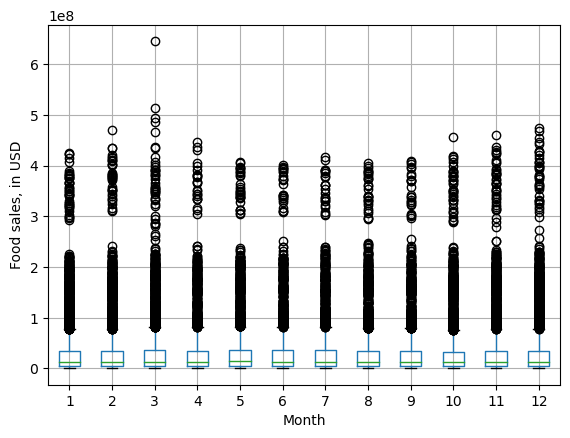

In [39]:
df_fixed.boxplot(column='Dollars', #Creating a box plot of the `Dollars` column 
                 by=['Month']) # Grouping by `Month`

plt.xlabel('Month')
plt.ylabel('Food sales, in USD')
plt.title('')
plt.suptitle('')

We can likewise look at the distirbution by year. In order to do this with matplotlib, we need to use the `subplot` method to create a `fig` object and `ax` objects.

Notice that we also need to change the methods for modifying the y scale, labels, and titles.

Text(0.5, 1.0, '')

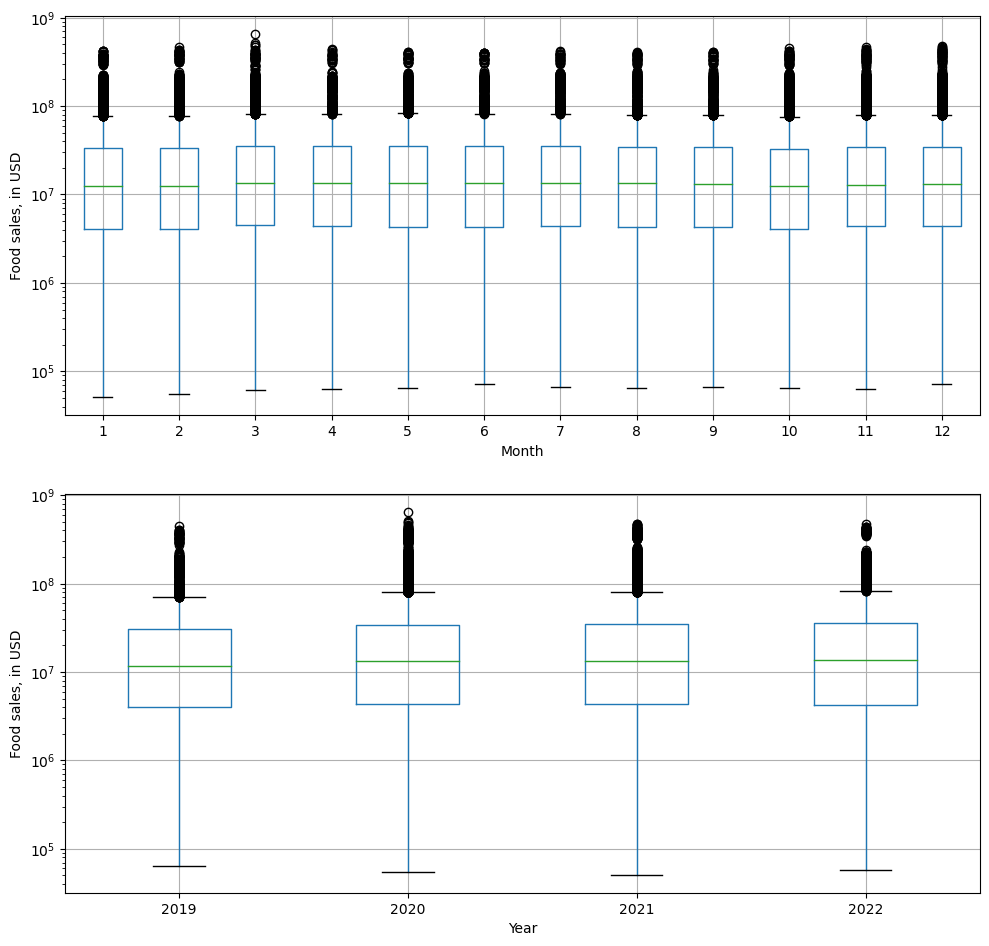

In [40]:
# This creates two subplots (2 rows by 1 column), which we name `ax1` and `ax2` here. 
# Figure size is the number of inches wide and tall
fig, [ax1, ax2] = plt.subplots(nrows=2, ncols=1, figsize=[10,10]) 

# We need to direct each plot to the subplot we want it to be plotted in
df_fixed.boxplot(column='Dollars', 
                 by=['Month'],
                 ax=ax1) 

# We need to direct each plot to the subplot we want it to be plotted in
df_fixed.boxplot(column='Dollars', 
                 by=['Year'],
                 ax=ax2) 

# Setting the scale and labels for each axis separately
ax1.set_yscale('log') # Look at how the log scale changes the presentation
ax2.set_yscale('log')

ax1.set_xlabel('Month')
ax1.set_ylabel('Food sales, in USD')

ax2.set_xlabel('Year')
ax2.set_ylabel('Food sales, in USD')

fig.tight_layout() #Adjusting the padding between subplots so nothing is overlapping

# Clearing all titles
fig.suptitle('')
ax1.set_title('')
ax2.set_title('')

Does anyone have different trends?

### What do you see on trends of Alcohol?

### Lineplot Alcohol Sales

How much alcohol is sold each month across the US by year?

In [41]:
print(df_fixed['Category'].dtypes)

object


In [42]:
# https://pandas.pydata.org/docs/reference/api/pandas.Series.str.contains.html
df_fixed['Category'].str.contains('Alcohol', regex=False)

# Alternate:
# df_fixed['Category']=='Alcohol'

0         True
1         True
2         True
3         True
4         True
         ...  
60539    False
60540    False
60541    False
60542    False
60543    False
Name: Category, Length: 60543, dtype: bool

In [43]:
print(df_fixed['Year'].dtypes)

int64


In [44]:
df_fixed['Year'] == 2019

0         True
1         True
2         True
3         True
4         True
         ...  
60539    False
60540    False
60541    False
60542    False
60543    False
Name: Year, Length: 60543, dtype: bool

In [45]:
mask_A19 = (df_fixed['Year'] == 2019) & (df_fixed['Category'].str.contains('Alcohol', regex=False))
print(sum(mask_A19))

559


In [46]:
alcohol_2019 = df_fixed.loc[mask_A19].copy()
alcohol_2019.head(10)

,Date,State,Category,Dollars,Unit sales,Volume sales,Dollars last year,Unit sales last year,Volume sales last year,Dollars 2 years ago,Volume sales 2 years ago,Unit sales 2 years ago,Percent change dollars 1 year,Percent change units 1 year,Percent change volume 1 year,Percent change dollars 2 years,Percent change units 2 years,Percent change volume 2 years,Month,Year
0,2019-10-06,Alabama,Alcohol,23580628.0,2969760.0,836512.0,22435659.0,2.976745e+06,814794.612815,NaN,NaN,NaN,5.1,-0.2,2.7,NaN,NaN,NaN,10,2019
1,2019-10-13,Alabama,Alcohol,23191408.0,2891303.0,828622.0,23309843.0,2.977404e+06,854998.728859,NaN,NaN,NaN,-0.5,-2.9,-3.1,NaN,NaN,NaN,10,2019
2,2019-10-20,Alabama,Alcohol,21743590.0,2727065.0,761632.0,21063269.0,2.744731e+06,765890.421220,NaN,NaN,NaN,3.2,-0.6,-0.6,NaN,NaN,NaN,10,2019
3,2019-10-27,Alabama,Alcohol,21929512.0,2761075.0,767176.0,20183470.0,2.650938e+06,713505.261937,NaN,NaN,NaN,8.7,4.2,7.5,NaN,NaN,NaN,10,2019
4,2019-11-03,Alabama,Alcohol,23150890.0,2868207.0,813904.0,22560881.0,2.883969e+06,801435.915630,NaN,NaN,NaN,2.6,-0.5,1.6,NaN,NaN,NaN,11,2019
5,2019-11-10,Alabama,Alcohol,22276720.0,2783846.0,767351.0,19882964.0,2.635797e+06,693708.607948,NaN,NaN,NaN,12.0,5.6,10.6,NaN,NaN,NaN,11,2019
6,2019-11-17,Alabama,Alcohol,21725385.0,2711620.0,752416.0,20070300.0,2.604246e+06,680873.187559,NaN,NaN,NaN,8.2,4.1,10.5,NaN,NaN,NaN,11,2019
7,2019-11-24,Alabama,Alcohol,22137668.0,2761483.0,751698.0,23778505.0,2.899261e+06,805454.523879,NaN,NaN,NaN,-6.9,-4.8,-6.7,NaN,NaN,NaN,11,2019
8,2019-12-01,Alabama,Alcohol,27755828.0,3215722.0,958602.0,19613160.0,2.531454e+06,692266.029866,NaN,NaN,NaN,41.5,27.0,38.5,NaN,NaN,NaN,12,2019
9,2019-12-08,Alabama,Alcohol,20469733.0,2589163.0,703857.0,18922094.0,2.425020e+06,651664.905358,NaN,NaN,NaN,8.2,6.8,8.0,NaN,NaN,NaN,12,2019


In [47]:
A19_Monthly_Sales = alcohol_2019.groupby('Month')['Dollars'].sum()
print(A19_Monthly_Sales)

Month
10    4.427563e+09
11    4.446345e+09
12    6.343541e+09
Name: Dollars, dtype: float64


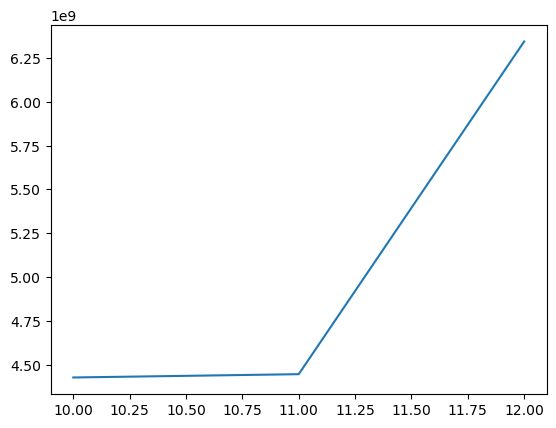

In [48]:
# plt.plot(x,y)
plt.plot(alcohol_2019['Month'].unique(), A19_Monthly_Sales)

In [49]:
year_selection = [2019, 2020, 2021, 2022] # we will create a line for each year

trend_lines_dict = {} # initialize an empty dictionary to store my trend lines

# Repeat operation for all years using a loop
for year in year_selection:
    
    # Create selection mask by year and category
    mask = (df_fixed['Year'] == year) & (df_fixed['Category'].str.contains('Alcohol', regex=False))
    
    # Select the sales of alcohol in the given year
    year_alcohol_sales = df_fixed.loc[mask].copy()
    
    # Group the sales by month
    monthly_alcohol_sales = year_alcohol_sales.groupby('Month')['Dollars'].sum()
    
    # Select the months represented in that year
    months_in_year = year_alcohol_sales['Month'].unique()
    
    # Add the sales and month data to dictionary
    trend_lines_dict[year] = (months_in_year, monthly_alcohol_sales)
    

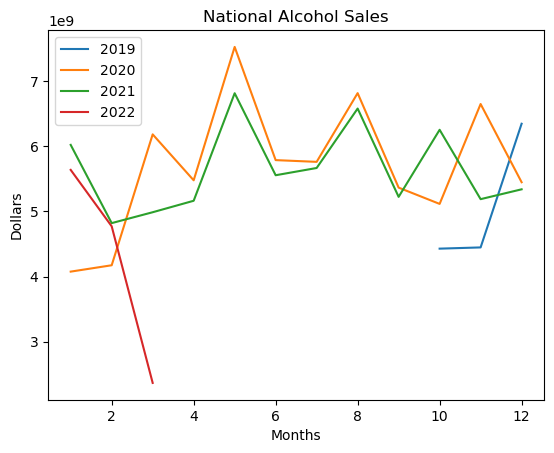

In [50]:
# https://www.tutorialspoint.com/plot-multiple-lines-in-matplotlib

# Plotting the lines with labels
for label, (x, y) in trend_lines_dict.items():
   plt.plot(x, y, label = label)

# Adding legend, x and y labels, and title for the lines
plt.legend()
plt.xlabel('Months')
plt.ylabel('Dollars')
plt.title('National Alcohol Sales')
# Displaying the plot
plt.show()

### Create a graph/table of your home state

Let's look at the alcohol sales my home state: California

Subsetting the data frame to only data from California

In [51]:
ca_alcohol_df = df_fixed[(df_fixed['State']=='California')&(df_fixed['Category']=='Alcohol')]

In [52]:
ca_alcohol_df.head()

,Date,State,Category,Dollars,Unit sales,Volume sales,Dollars last year,Unit sales last year,Volume sales last year,Dollars 2 years ago,Volume sales 2 years ago,Unit sales 2 years ago,Percent change dollars 1 year,Percent change units 1 year,Percent change volume 1 year,Percent change dollars 2 years,Percent change units 2 years,Percent change volume 2 years,Month,Year
384,2019-10-06,California,Alcohol,148167595.0,16189578.0,3467868.0,142388185.0,1.588294e+07,3.431440e+06,NaN,NaN,NaN,4.1,1.9,1.1,NaN,NaN,NaN,10,2019
385,2019-10-13,California,Alcohol,147763058.0,16093009.0,3492788.0,137541121.0,1.540573e+07,3.285414e+06,NaN,NaN,NaN,7.4,4.5,6.3,NaN,NaN,NaN,10,2019
386,2019-10-20,California,Alcohol,145808033.0,15914565.0,3395006.0,142022698.0,1.591855e+07,3.392728e+06,NaN,NaN,NaN,2.7,0.0,0.1,NaN,NaN,NaN,10,2019
387,2019-10-27,California,Alcohol,153220381.0,16533263.0,3645987.0,147788609.0,1.619103e+07,3.597714e+06,NaN,NaN,NaN,3.7,2.1,1.3,NaN,NaN,NaN,10,2019
388,2019-11-03,California,Alcohol,153313459.0,16398770.0,3517438.0,146292910.0,1.622293e+07,3.495370e+06,NaN,NaN,NaN,4.8,1.1,0.6,NaN,NaN,NaN,11,2019


Text(0, 0.5, 'Alcohol sales, in USD')

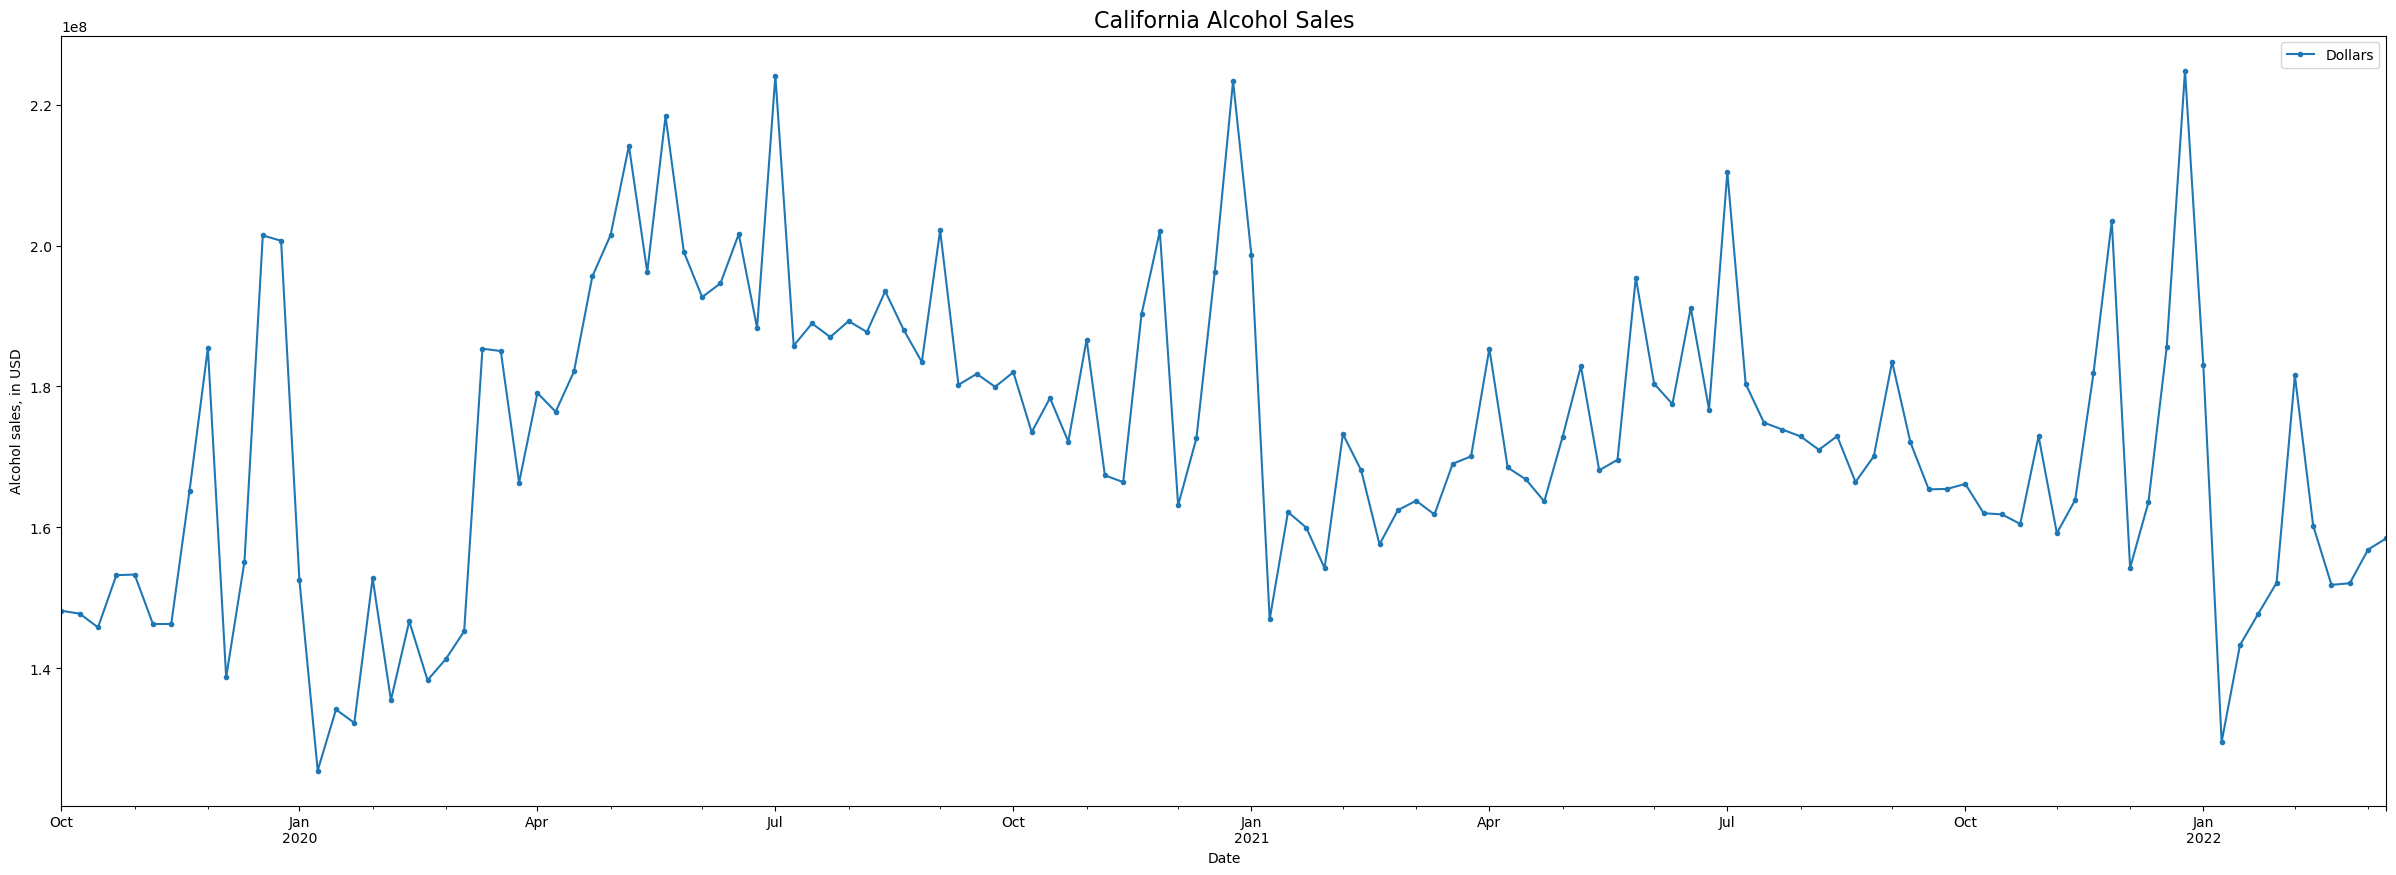

In [53]:
ca_alcohol_df.plot(y= 'Dollars', 
                         x='Date',
                         figsize=(30, 10),
                        style='.-')
plt.title('California Alcohol Sales', size=16) #Setting the title
plt.ylabel('Alcohol sales, in USD') #Setting the y-axis title

## Bonus: Which state may consume the most vegetables?

An easy way to look at this would be to group the data frame by State and then sum

In [54]:
#Subsetting to just vegetables, then grouping by State, summing, then sorting in descending order
state_vegetables_df = df_fixed[df_fixed['Category']=='Vegetables'].groupby(['State']).sum().sort_values('Unit sales', ascending=False) 
state_vegetables_df.head()

C:\Users\veronica.swanson\AppData\Local\Temp\ipykernel_14124\346272170.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  state_vegetables_df = df_fixed[df_fixed['Category']=='Vegetables'].groupby(['State']).sum().sort_values('Unit sales', ascending=False)


,Dollars,Unit sales,Volume sales,Dollars last year,Unit sales last year,Volume sales last year,Dollars 2 years ago,Volume sales 2 years ago,Unit sales 2 years ago,Percent change dollars 1 year,Percent change units 1 year,Percent change volume 1 year,Percent change dollars 2 years,Percent change units 2 years,Percent change volume 2 years,Month,Year
State,,,,,,,,,,,,,,,,,
California,1.344395e+10,6.693803e+09,9.312842e+09,1.280383e+10,6.481430e+09,9.076795e+09,7.018532e+09,3.592315e+09,5.032596e+09,843.3,613.0,550.4,1024.3,717.7,603.4,837,256599
Texas,8.671989e+09,5.559992e+09,8.391033e+09,8.380480e+09,5.537854e+09,8.321266e+09,4.724445e+09,3.140500e+09,4.716977e+09,617.0,239.3,280.3,647.2,220.8,287.1,838,258621
Florida,1.033763e+10,4.785308e+09,7.092262e+09,9.780549e+09,4.607087e+09,6.930811e+09,5.479307e+09,2.604640e+09,3.963307e+09,878.0,644.3,464.3,1020.8,702.0,471.3,838,258621
New York,6.850664e+09,3.036511e+09,4.332241e+09,6.627697e+09,3.034827e+09,4.393920e+09,3.700155e+09,1.729469e+09,2.529007e+09,605.7,159.6,-28.1,750.7,191.4,-44.7,838,258621
North Carolina,4.641420e+09,2.466525e+09,3.621187e+09,4.280265e+09,2.353886e+09,3.540075e+09,2.345253e+09,1.311060e+09,2.005882e+09,1240.3,787.2,454.7,1591.0,972.5,548.7,838,258621


Looks like it could be California, but we would need to adjust for population

To adjust for population, let's pull in population by state via the Decennial Census API

Setting the url for the data we want to pull down

In [55]:
Census2020Pop_url = 'https://api.census.gov/data/2020/dec/pl?get=P1_001N&for=state:*'

Create a get request and read the request as JSON text

Remember we added the request library at the top of our notebook

In [56]:
Census2020Pop_json = requests.get(Census2020Pop_url).text #get the text of the request at the Census2020Pop_url
Census2020Pop_json[0:1000] #Return the 1st 1000 values

'[["P1_001N","state"],\n["13002700","42"],\n["39538223","06"],\n["1793716","54"],\n["3271616","49"],\n["20201249","36"],\n["689545","11"],\n["733391","02"],\n["21538187","12"],\n["5118425","45"],\n["779094","38"],\n["1362359","23"],\n["10711908","13"],\n["5024279","01"],\n["1377529","33"],\n["4237256","41"],\n["576851","56"],\n["7151502","04"],\n["4657757","22"],\n["6785528","18"],\n["1839106","16"],\n["3605944","09"],\n["1455271","15"],\n["12812508","17"],\n["7029917","25"],\n["29145505","48"],\n["1084225","30"],\n["1961504","31"],\n["11799448","39"],\n["5773714","08"],\n["9288994","34"],\n["6177224","24"],\n["8631393","51"],\n["643077","50"],\n["10439388","37"],\n["3011524","05"],\n["7705281","53"],\n["2937880","20"],\n["3959353","40"],\n["5893718","55"],\n["2961279","28"],\n["6154913","29"],\n["10077331","26"],\n["1097379","44"],\n["5706494","27"],\n["3190369","19"],\n["2117522","35"],\n["3104614","32"],\n["989948","10"],\n["3285874","72"],\n["4505836","21"],\n["886667","46"],\n["69

Parse that text into a pandas data frame using the `read_json` method

In [57]:
census_pop_df = pd.read_json(Census2020Pop_json) #Read in the JSON string into a data frame
census_pop_df

,0,1
0,P1_001N,state
1,13002700,42
2,39538223,06
3,1793716,54
4,3271616,49
5,20201249,36
6,689545,11
7,733391,02
8,21538187,12
9,5118425,45


In [58]:
census_pop_df.head()

,0,1
0,P1_001N,state
1,13002700,42
2,39538223,06
3,1793716,54
4,3271616,49


In [59]:
census_pop_df.columns = census_pop_df.iloc[0,:] # Copying the 1st row to the header
census_pop_df.head()

,P1_001N,state
0,P1_001N,state
1,13002700,42
2,39538223,06
3,1793716,54
4,3271616,49


In [60]:
census_pop_df = census_pop_df.iloc[1:] #Removing the first row
census_pop_df.head()

,P1_001N,state
1,13002700,42
2,39538223,06
3,1793716,54
4,3271616,49
5,20201249,36


In [61]:
census_pop_df.rename(columns={'P1_001N':'Pop2020'}, inplace=True) #Renaming the P1_001N column
census_pop_df.head()

C:\Users\veronica.swanson\AppData\Local\Temp\ipykernel_14124\2425708824.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  census_pop_df.rename(columns={'P1_001N':'Pop2020'}, inplace=True) #Renaming the P1_001N column


,Pop2020,state
1,13002700,42
2,39538223,06
3,1793716,54
4,3271616,49
5,20201249,36


In [62]:
census_pop_df.dtypes #Showing the data types

0
Pop2020    object
state      object
dtype: object

We need the data types to be interger so they can be merged with the integer data type in `state_vegetables_df`

In [63]:
census_pop_df['Pop2020'] = census_pop_df['Pop2020'].astype(int)
census_pop_df['state'] = census_pop_df['state'].astype(int)
census_pop_df.dtypes

C:\Users\veronica.swanson\AppData\Local\Temp\ipykernel_14124\1071241694.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  census_pop_df['Pop2020'] = census_pop_df['Pop2020'].astype(int)
C:\Users\veronica.swanson\AppData\Local\Temp\ipykernel_14124\1071241694.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  census_pop_df['state'] = census_pop_df['state'].astype(int)


0
Pop2020    int32
state      int32
dtype: object

Since these populations are aggregated by FIPS codes, we need to convert to state names. I created a CSV file from [this table](https://www.census.gov/library/reference/code-lists/ansi.html#state) from the US Census Bureau that we can read in

In [64]:
fips_codes_df = pd.read_csv('fips_codes.csv')
fips_codes_df.head()

,Name,FIPS,Abbreviation
0,Alabama,1,AL
1,Alaska,2,AK
2,Arizona,4,AZ
3,Arkansas,5,AR
4,California,6,CA


Then merge `fips_codes_df`with census_pop_df 

In [65]:
census_pop_df.head()

,Pop2020,state
1,13002700,42
2,39538223,6
3,1793716,54
4,3271616,49
5,20201249,36


In [66]:
fips_codes_df.head()

,Name,FIPS,Abbreviation
0,Alabama,1,AL
1,Alaska,2,AK
2,Arizona,4,AZ
3,Arkansas,5,AR
4,California,6,CA


We are merging the census_pop_df with the fips_codes_df using the 'state' column from census_pop_df and 'FIPS' from fips_codes_df

In [67]:
census_pop_df = census_pop_df.merge(fips_codes_df, left_on='state', right_on='FIPS', how='left')
census_pop_df.head()

,Pop2020,state,Name,FIPS,Abbreviation
0,13002700,42,Pennsylvania,42,PA
1,39538223,6,California,6,CA
2,1793716,54,West Virginia,54,WV
3,3271616,49,Utah,49,UT
4,20201249,36,New York,36,NY


Merging with the `state_vegetables_df`

In [68]:
state_vegetables_df.head()

,Dollars,Unit sales,Volume sales,Dollars last year,Unit sales last year,Volume sales last year,Dollars 2 years ago,Volume sales 2 years ago,Unit sales 2 years ago,Percent change dollars 1 year,Percent change units 1 year,Percent change volume 1 year,Percent change dollars 2 years,Percent change units 2 years,Percent change volume 2 years,Month,Year
State,,,,,,,,,,,,,,,,,
California,1.344395e+10,6.693803e+09,9.312842e+09,1.280383e+10,6.481430e+09,9.076795e+09,7.018532e+09,3.592315e+09,5.032596e+09,843.3,613.0,550.4,1024.3,717.7,603.4,837,256599
Texas,8.671989e+09,5.559992e+09,8.391033e+09,8.380480e+09,5.537854e+09,8.321266e+09,4.724445e+09,3.140500e+09,4.716977e+09,617.0,239.3,280.3,647.2,220.8,287.1,838,258621
Florida,1.033763e+10,4.785308e+09,7.092262e+09,9.780549e+09,4.607087e+09,6.930811e+09,5.479307e+09,2.604640e+09,3.963307e+09,878.0,644.3,464.3,1020.8,702.0,471.3,838,258621
New York,6.850664e+09,3.036511e+09,4.332241e+09,6.627697e+09,3.034827e+09,4.393920e+09,3.700155e+09,1.729469e+09,2.529007e+09,605.7,159.6,-28.1,750.7,191.4,-44.7,838,258621
North Carolina,4.641420e+09,2.466525e+09,3.621187e+09,4.280265e+09,2.353886e+09,3.540075e+09,2.345253e+09,1.311060e+09,2.005882e+09,1240.3,787.2,454.7,1591.0,972.5,548.7,838,258621


In [69]:
census_pop_df.head()

,Pop2020,state,Name,FIPS,Abbreviation
0,13002700,42,Pennsylvania,42,PA
1,39538223,6,California,6,CA
2,1793716,54,West Virginia,54,WV
3,3271616,49,Utah,49,UT
4,20201249,36,New York,36,NY


In [70]:
state_vegetables_df = state_vegetables_df.merge(census_pop_df, left_on='State', right_on ='Name', how='left')
state_vegetables_df.head()

,Dollars,Unit sales,Volume sales,Dollars last year,Unit sales last year,Volume sales last year,Dollars 2 years ago,Volume sales 2 years ago,Unit sales 2 years ago,Percent change dollars 1 year,...,Percent change dollars 2 years,Percent change units 2 years,Percent change volume 2 years,Month,Year,Pop2020,state,Name,FIPS,Abbreviation
0,1.344395e+10,6.693803e+09,9.312842e+09,1.280383e+10,6.481430e+09,9.076795e+09,7.018532e+09,3.592315e+09,5.032596e+09,843.3,...,1024.3,717.7,603.4,837,256599,39538223,6,California,6,CA
1,8.671989e+09,5.559992e+09,8.391033e+09,8.380480e+09,5.537854e+09,8.321266e+09,4.724445e+09,3.140500e+09,4.716977e+09,617.0,...,647.2,220.8,287.1,838,258621,29145505,48,Texas,48,TX
2,1.033763e+10,4.785308e+09,7.092262e+09,9.780549e+09,4.607087e+09,6.930811e+09,5.479307e+09,2.604640e+09,3.963307e+09,878.0,...,1020.8,702.0,471.3,838,258621,21538187,12,Florida,12,FL
3,6.850664e+09,3.036511e+09,4.332241e+09,6.627697e+09,3.034827e+09,4.393920e+09,3.700155e+09,1.729469e+09,2.529007e+09,605.7,...,750.7,191.4,-44.7,838,258621,20201249,36,New York,36,NY
4,4.641420e+09,2.466525e+09,3.621187e+09,4.280265e+09,2.353886e+09,3.540075e+09,2.345253e+09,1.311060e+09,2.005882e+09,1240.3,...,1591.0,972.5,548.7,838,258621,10439388,37,North Carolina,37,NC


Now we need to calculate the vegetables sales per capita

In [71]:
state_vegetables_df['Volume per capita'] = state_vegetables_df['Unit sales']/state_vegetables_df['Pop2020']

In [72]:
state_vegetables_df.sort_values(['Volume per capita'], ascending=False).set_index('Name').head()

,Dollars,Unit sales,Volume sales,Dollars last year,Unit sales last year,Volume sales last year,Dollars 2 years ago,Volume sales 2 years ago,Unit sales 2 years ago,Percent change dollars 1 year,...,Percent change dollars 2 years,Percent change units 2 years,Percent change volume 2 years,Month,Year,Pop2020,state,FIPS,Abbreviation,Volume per capita
Name,,,,,,,,,,,,,,,,,,,,,
New Hampshire,7.962501e+08,3.882406e+08,5.736411e+08,7.609804e+08,3.822466e+08,5.756992e+08,4.190422e+08,2.139211e+08,3.268051e+08,785.1,...,1007.5,478.8,149.9,838,258621,1377529,33,33,NH,281.838451
Maine,8.168688e+08,3.741263e+08,5.456034e+08,7.755811e+08,3.653137e+08,5.449041e+08,4.341488e+08,2.072027e+08,3.125358e+08,782.3,...,1045.9,561.6,201.9,838,258621,1362359,23,23,ME,274.616516
Colorado,2.859115e+09,1.517275e+09,2.147181e+09,2.726197e+09,1.476387e+09,2.134607e+09,1.526676e+09,8.291767e+08,1.216745e+09,748.5,...,965.0,641.0,271.9,838,258621,5773714,8,8,CO,262.790105
Arizona,3.038819e+09,1.859249e+09,2.822320e+09,2.836755e+09,1.784297e+09,2.757710e+09,1.582144e+09,1.009311e+09,1.565807e+09,1055.5,...,1227.3,761.1,404.1,838,258621,7151502,4,4,AZ,259.980261
Wyoming,2.816245e+08,1.436657e+08,2.368227e+08,2.765579e+08,1.438607e+08,2.435736e+08,1.590916e+08,8.319172e+07,1.426764e+08,306.1,...,356.9,68.8,-357.5,838,258621,576851,56,56,WY,249.051610


Looks like New Hampshire eats the most vegetables per capita